In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve

df = pd.read_csv("promisin_couples.csv")
#df.replace(to_replace = -1 , value =np.nan)

X_df = df.iloc[:, 1:138]
y = df.iloc[:, 139]

#imputing missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer()
#imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
#imputer.fit(X[:, 1:138])
#X[:, 1:138] = imputer.transform(X[:, 1:138])
X = imputer.fit_transform(X_df)

#Making all the values discrete
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X = est.fit_transform(X)

#chi square based feauture selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(mutual_info_classif, k=20)
fit = selector.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featDf = featureScores.nlargest(10,'Score')
print(featDf)

C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:163: UserWarning: Feature 125 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:163: UserWarning: Feature 131 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:163: UserWarning: Feature 132 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:163: UserWarning: Feature 133 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:163: UserWarning: Feature 134 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:

                     Specs     Score
70  q31_other_text_entered  0.184690
30                 married  0.183788
76                   q33_6  0.182543
7           marital_status  0.182030
69                   q31_9  0.171499
72                   q33_2  0.165041
26     met_through_friends  0.162311
17              coresident  0.152347
44                     q8a  0.143144
82            q24_R_friend  0.141696


In [47]:
print(featureScores.nlargest(10,'Score')) 

                     Specs     Score
30                 married  0.201429
7           marital_status  0.192407
70  q31_other_text_entered  0.184491
76                   q33_6  0.182423
69                   q31_9  0.176925
26     met_through_friends  0.175326
48                    q13a  0.166330
82            q24_R_friend  0.161102
72                   q33_2  0.160050
17              coresident  0.149973


In [55]:
featDf.to_csv("Selected Features(m_classif10).csv")

PermissionError: [Errno 13] Permission denied: 'Selected Features(m_classif10).csv'

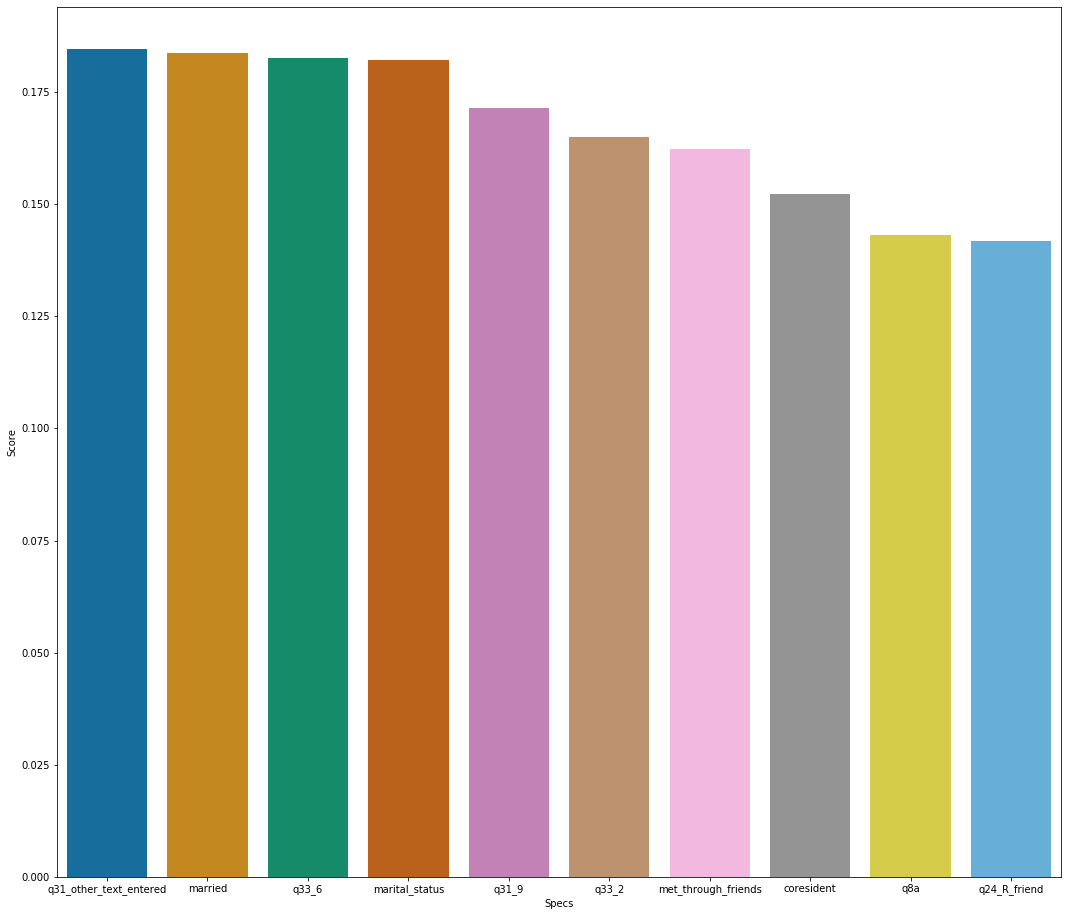

In [61]:
fig = plt.figure(figsize=(18,16))
bplot = sns.barplot(y='Score', x='Specs', 
                 data=featDf, 
                 palette="colorblind")